In [5]:
import imageio.v3 as iio
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import numpy as np
import pandas as pd
from pathlib import Path
from segmentflow import segment, view
from skimage import exposure
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


This notebook tests different values of the minimum seed distance (MSD) for a
watershed segmentation after semantically segmenting the image with Otsu
threshold values. The image in question is
an SEM back-scattered electron (BSE) image of
IDOX-Estane collected by Nate Peterson at Colorado School of Mines.

(481, 555)
(481, 555)


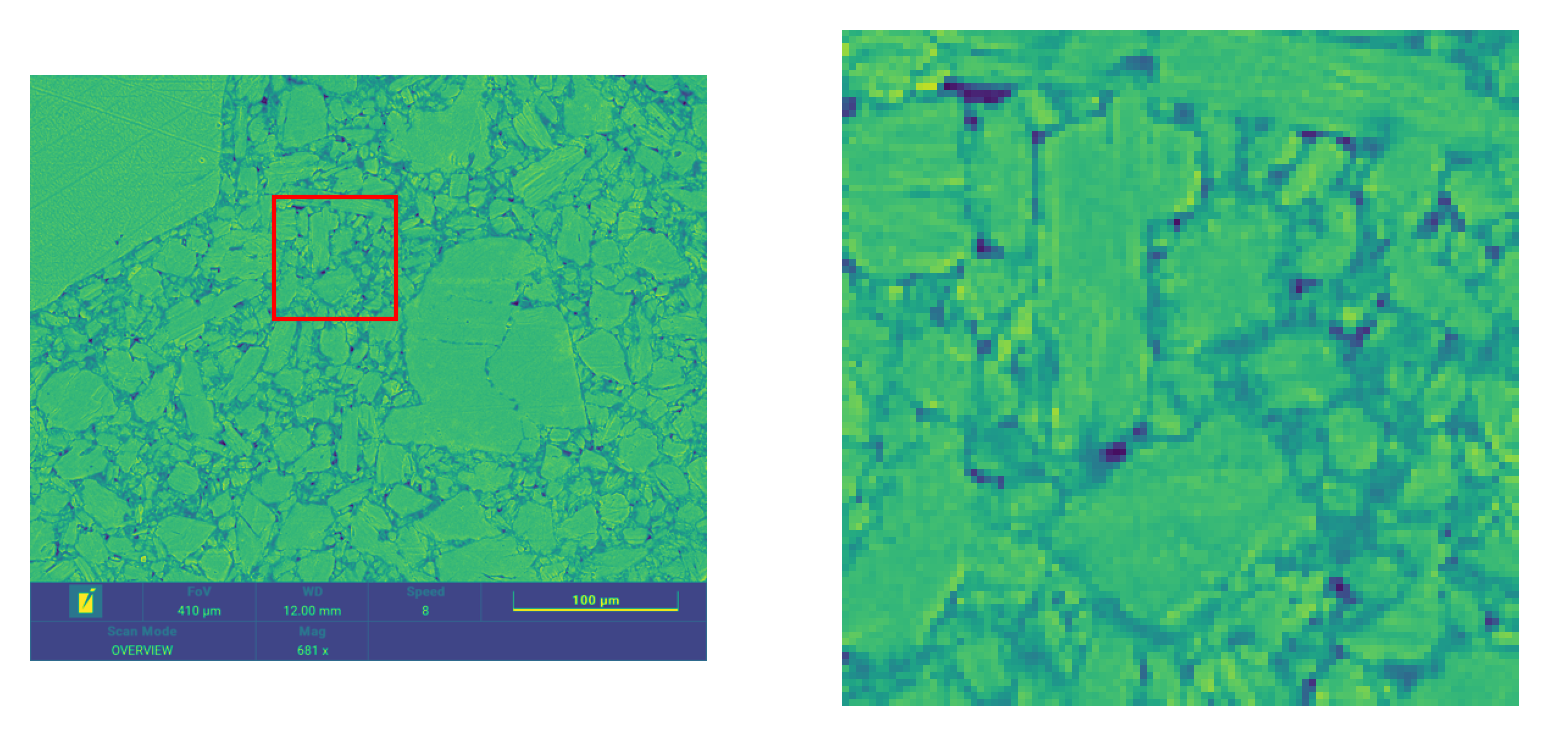

In [6]:
img_dir_path = Path('../data/sem_idox_estane1.tif')
img = iio.imread(img_dir_path)
print(img.shape)
# img = img[:400, :]
print(img.shape)
fig, axes = plt.subplots(1, 2, dpi=300)
axes[0].imshow(img, vmin=img.min(), vmax=img.max())
row_crop = [100, 200]
col_crop = [200, 300]
rect = patches.Rectangle(
    (col_crop[0], row_crop[0]),
    col_crop[1]-col_crop[0], row_crop[1]-row_crop[0],
    linewidth=1, edgecolor='r', facecolor='none')
axes[0].add_patch(rect)
img_crop = img[row_crop[0]:row_crop[1], col_crop[0]:col_crop[1]]
axes[1].imshow(
    img_crop, vmin=img.min(), vmax=img.max())
for a in axes:
    a.set_axis_off()

Generating histogram...


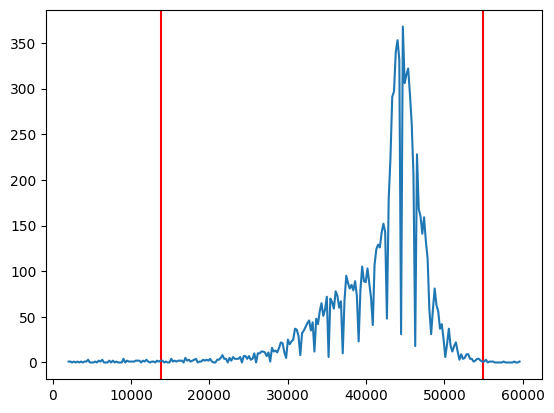

In [7]:
rescale_range = [0.5, 99.9]
fig, ax = view.histogram(img_crop, mark_percentiles=rescale_range)

Preprocessing images...
--> Applying median filter...
--> Rescaling intensities to percentile range [0.5, 99.9]...
--> Preprocessing complete.


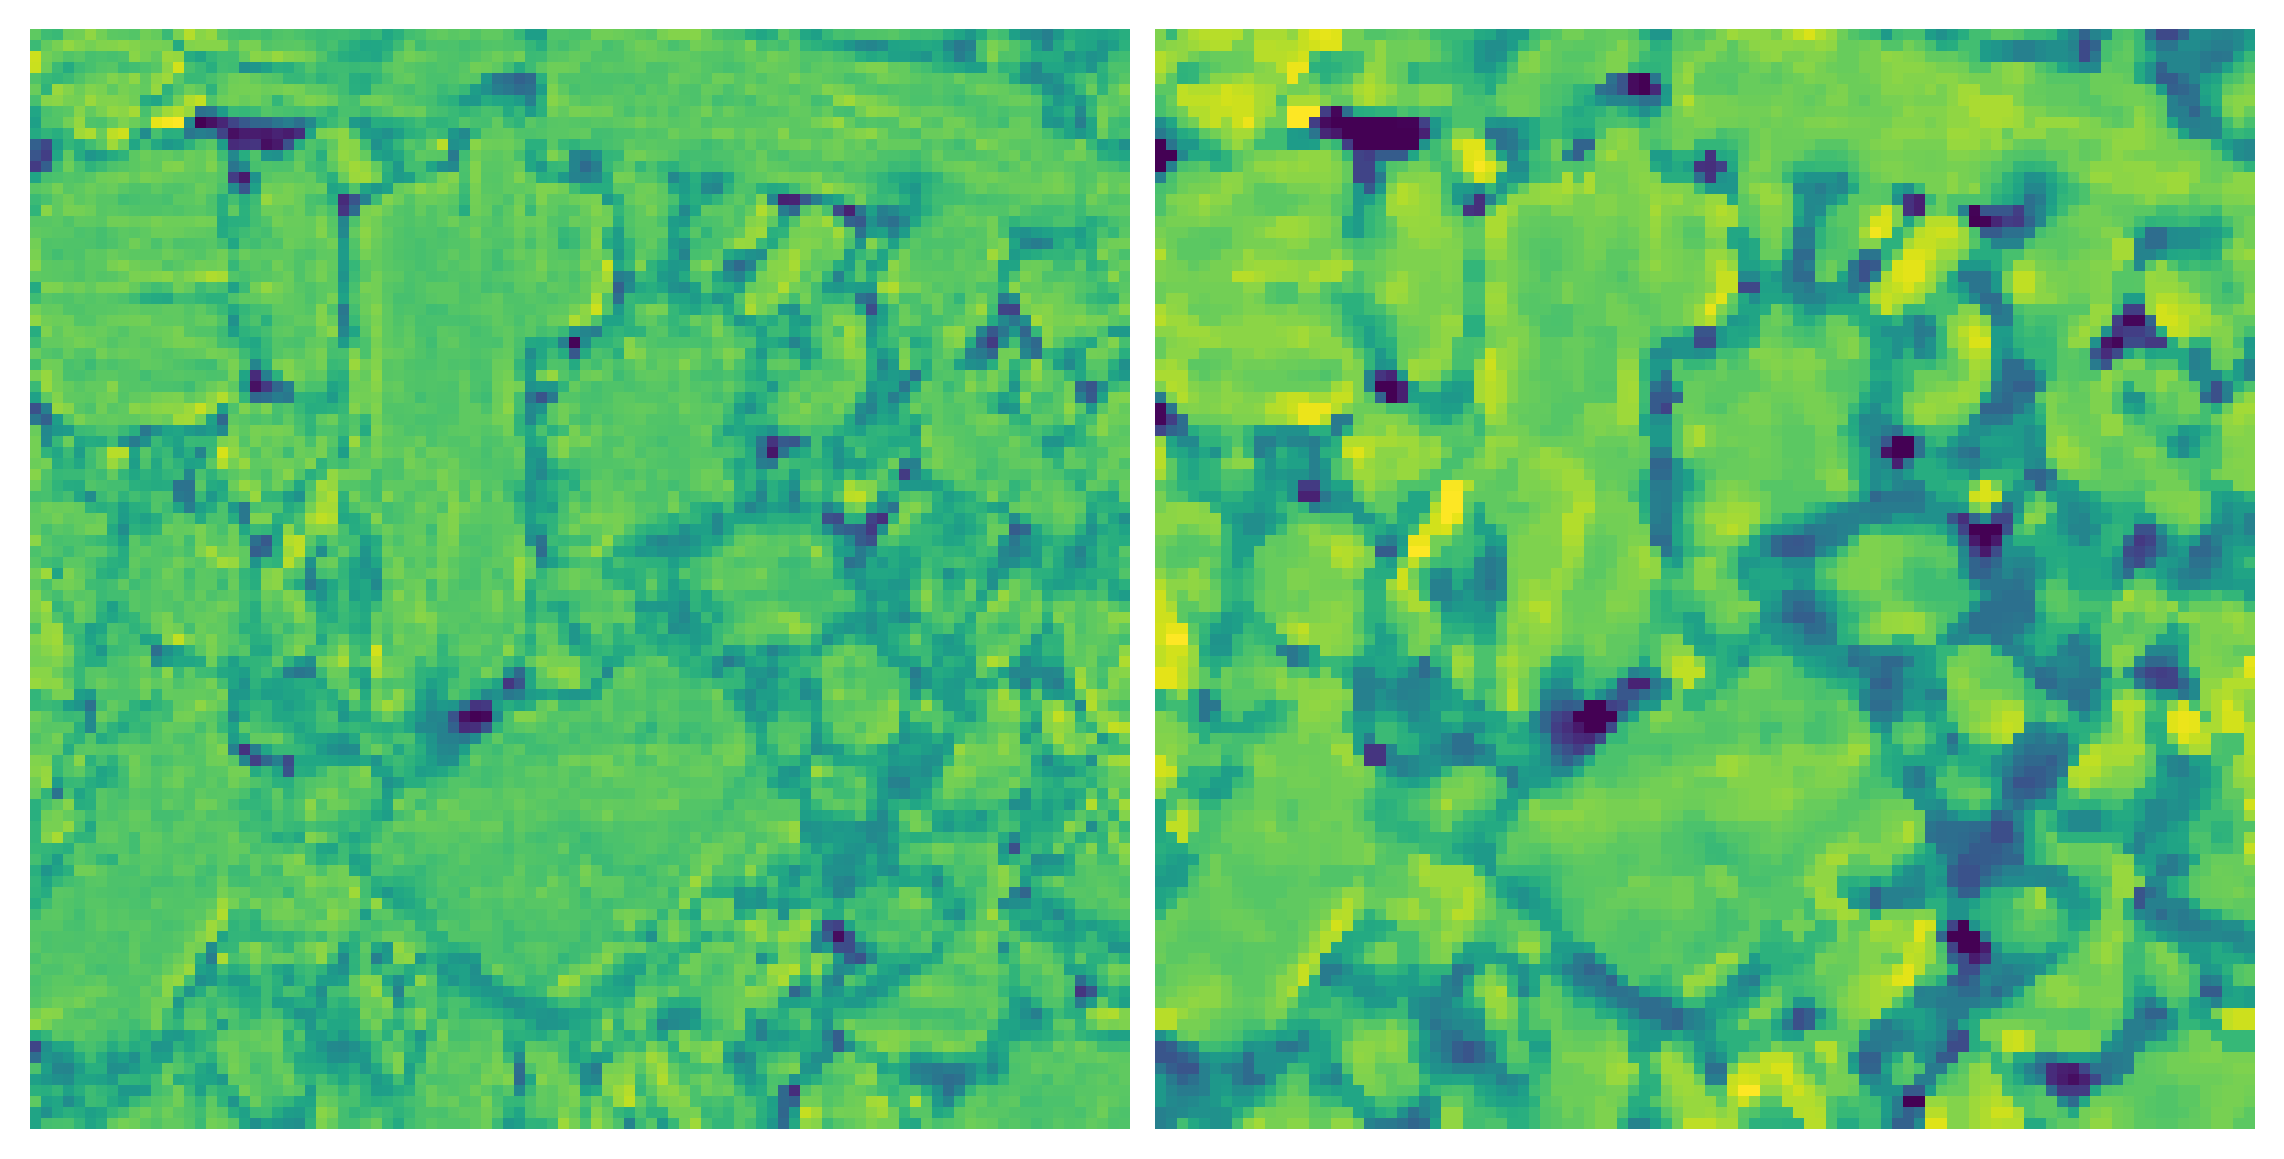

In [8]:
# Preprocess images
img_pre = segment.preprocess(
    img_crop, median_filter=True, rescale_intensity_range=rescale_range
)
fig, axes = view.images([img_crop, img_pre], dpi=300)

In [9]:
img_semantic, thresh_vals = segment.binarize_multiotsu(img_crop)
img_pre_semantic, pre_thresh_vals = segment.binarize_multiotsu(img_pre)
for imgs_labeled, label in zip(
    [img_semantic, img_pre_semantic], ['Raw:', 'Pre-processed:']
):
    print(label)
    n_voxels = imgs_labeled.shape[0] * imgs_labeled.shape[1]
    n_binder = np.count_nonzero(imgs_labeled == 0)
    n_particles = np.count_nonzero(imgs_labeled > 0)
    print('--> Area fraction particles:', n_particles / n_voxels)

Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Binarizing images...
--> Calculating Otsu threshold(s)...
--> Binarization complete.
Raw:
--> Area fraction particles: 0.7639
Pre-processed:
--> Area fraction particles: 0.7311


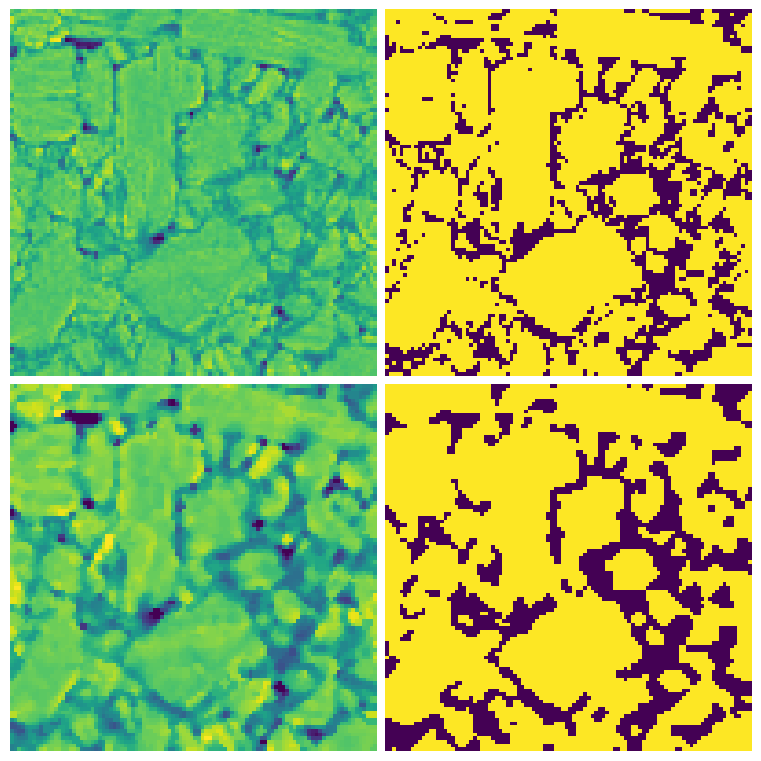

In [10]:
fig, axes = view.images(
    [img_crop, img_semantic, img_pre, img_pre_semantic],
    imgs_per_row=2, dpi=100)

## Test instance segmentation

Segmenting images...
--> Segmentation complete. 77 particle(s) segmented.
Segmenting images...
--> Segmentation complete. 58 particle(s) segmented.


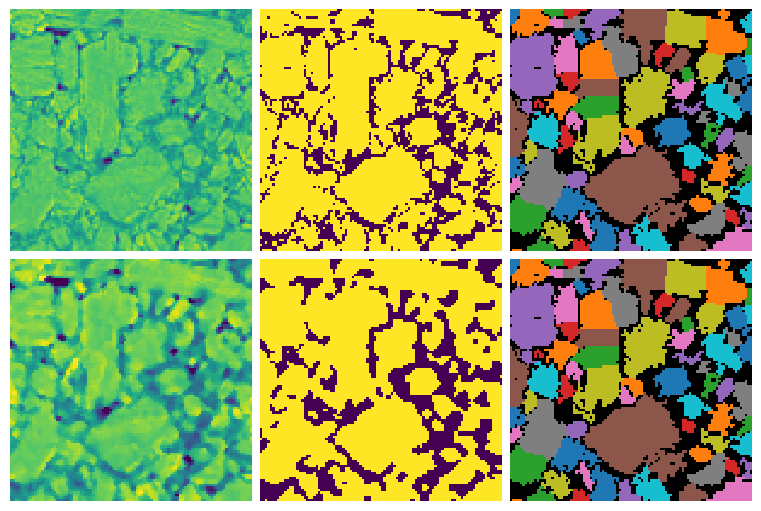

In [11]:
img_labeled_4msd = segment.watershed_segment(img_semantic, min_peak_distance=4)
img_labeled_color_4msd = view.color_labels(img_labeled_4msd, return_image=True)
img_pre_labeled_4msd = segment.watershed_segment(
    img_pre_semantic, min_peak_distance=4)
img_pre_labeled_color_4msd = view.color_labels(
    img_labeled_4msd, return_image=True)
fig, axes = view.images(
    [img_crop, img_semantic, img_labeled_color_4msd,
     img_pre, img_pre_semantic, img_pre_labeled_color_4msd],
    imgs_per_row=3, dpi=100)

Minimum seed/peak distance of 4 cuts out some small particles, trying smaller values

Segmenting images...
--> Segmentation complete. 112 particle(s) segmented.
Segmenting images...
--> Segmentation complete. 78 particle(s) segmented.


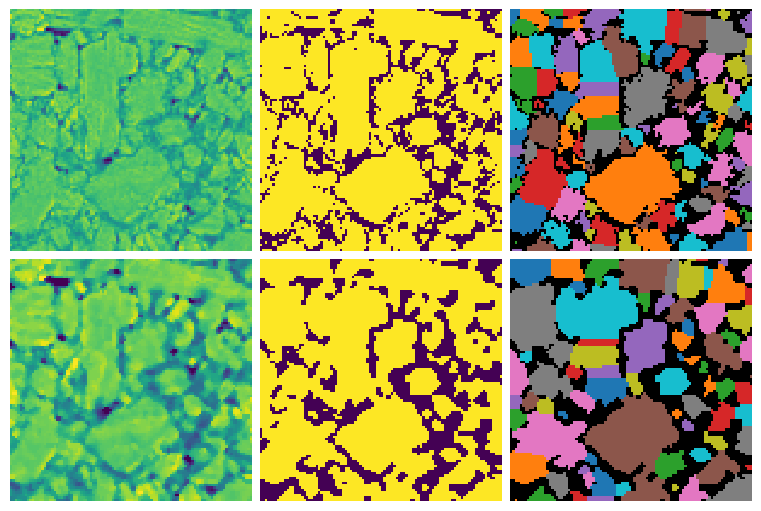

In [12]:
img_labeled_3msd = segment.watershed_segment(img_semantic, min_peak_distance=3)
img_labeled_color_3msd = view.color_labels(img_labeled_3msd, return_image=True)
img_pre_labeled_3msd = segment.watershed_segment(
    img_pre_semantic, min_peak_distance=3)
img_pre_labeled_color_3msd = view.color_labels(
    img_pre_labeled_3msd, return_image=True)
fig, axes = view.images(
    [img_crop, img_semantic, img_labeled_color_3msd,
     img_pre, img_pre_semantic, img_pre_labeled_color_3msd],
    imgs_per_row=3, dpi=100)

Segmenting images...
--> Segmentation complete. 201 particle(s) segmented.
Segmenting images...
--> Segmentation complete. 112 particle(s) segmented.


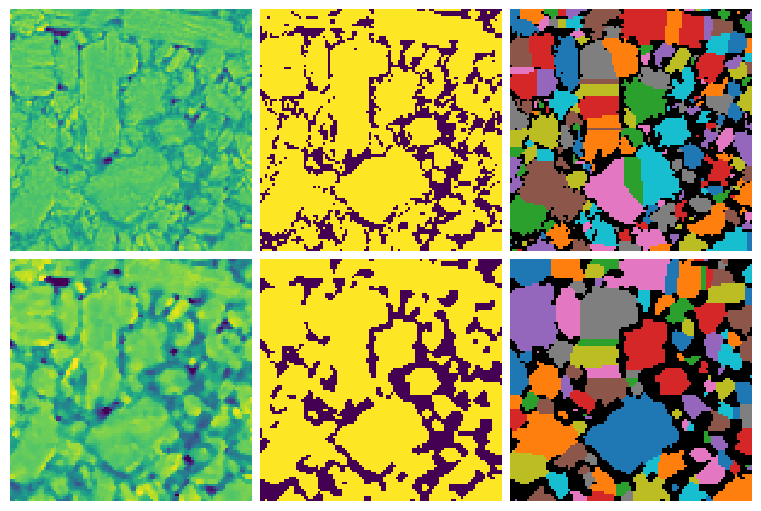

In [13]:
img_labeled_2msd = segment.watershed_segment(img_semantic, min_peak_distance=2)
img_labeled_color_2msd = view.color_labels(img_labeled_2msd, return_image=True)
img_pre_labeled_2msd = segment.watershed_segment(
    img_pre_semantic, min_peak_distance=2)
img_pre_labeled_color_2msd = view.color_labels(
    img_pre_labeled_2msd, return_image=True)
fig, axes = view.images(
    [img_crop, img_semantic, img_labeled_color_2msd,
     img_pre, img_pre_semantic, img_pre_labeled_color_2msd],
    imgs_per_row=3, dpi=100)

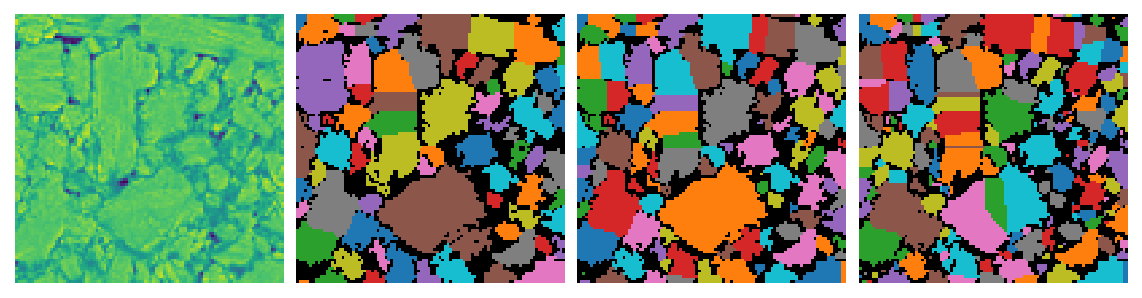

In [14]:
fig, axes = view.images(
    [img_crop, img_labeled_color_4msd, img_labeled_color_3msd,
     img_labeled_color_2msd],
    dpi=150)

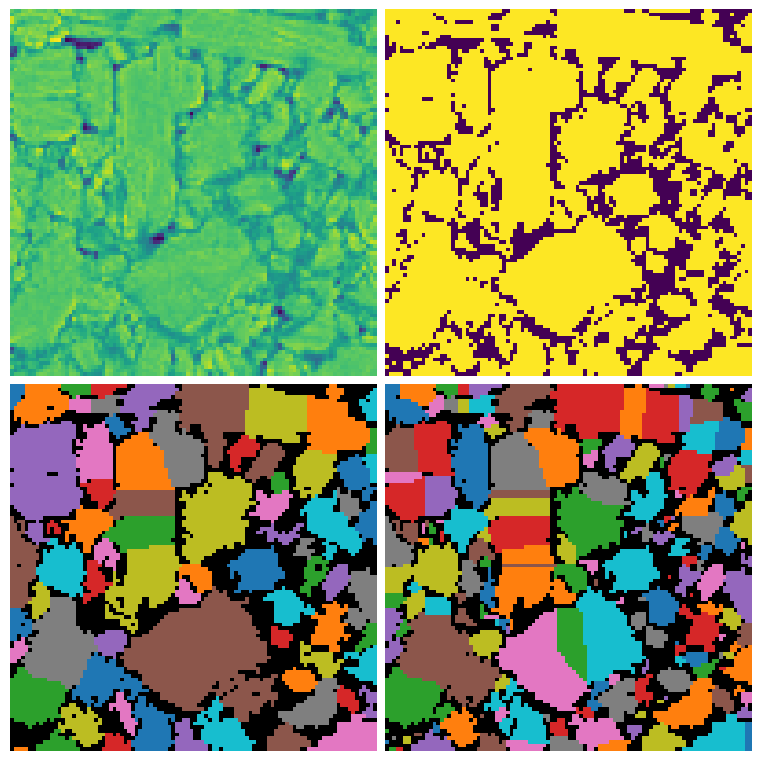

In [15]:
fig, axes = view.images(
    [img_crop, img_semantic, img_labeled_color_4msd, img_labeled_color_2msd],
    imgs_per_row=2, dpi=100)